In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_table(r"D:/DM/datasets/people.txt", sep=" ")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           5 non-null      int64  
 1   agegroup      5 non-null      object 
 2   height        5 non-null      float64
 3   status        5 non-null      object 
 4   yearsmarried  5 non-null      int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 328.0+ bytes


In [5]:
df.describe()

,Age,height,yearsmarried
count,5.000000,5.00000,5.000000
mean,59.200000,2.54000,4.800000
std,91.163041,5.45967,8.642916
min,2.000000,-7.00000,-1.000000
25%,18.000000,3.00000,0.000000
50%,21.000000,5.00000,2.000000
75%,34.000000,5.70000,3.000000
max,221.000000,6.00000,20.000000


In [6]:
isAgeValid = (df['Age'] > 0) & (df['Age'] < 150)
isAgeValid

0     True
1     True
2     True
3    False
4     True
Name: Age, dtype: bool

In [7]:
invalidYearsMarried = df['Age'] > df['yearsmarried']
invalidYearsMarried

0     True
1     True
2    False
3     True
4     True
dtype: bool

In [8]:
invalidStatus = ((df['status'] == 'single')  | (df['status'] == 'married') | (df['status'] == 'widowed'))
invalidStatus

0    True
1    True
2    True
3    True
4    True
Name: status, dtype: bool

In [9]:
Invalidagegroup = ((df['Age'] < 18)  & (df['agegroup'] == 'child')) | ((df['Age'] >= 18) & (df['Age'] < 65) & (df['agegroup'] == 'adult')) |  ((df['Age'] >= 65) & (df['agegroup'] == 'elderly'))
Invalidagegroup

0     True
1     True
2     True
3     True
4    False
dtype: bool

In [10]:
agegr2 = ((df.Age < 18)  & (df.agegroup == 'child')) | ((df.Age >= 18) & (df.Age < 65) & (df.agegroup == 'adult')) | ((df.Age >= 65) & (df['agegroup'] == 'elderly'))

In [11]:
invalidData = {
    'isAgeValid' : {'InvalidCount' : len(df) - isAgeValid.sum()},
    'YearMarried' : {'InvalidCount' : len(df) - invalidYearsMarried.sum()},
    'Status' : {'InvalidCount' : len(df) - invalidStatus.sum()},
    'AgeGroup' : {'InvalidCount' : len(df) - Invalidagegroup.sum()} 
    
}

In [12]:
invalidData = {
    'isAgeValid' :  len(df) - isAgeValid.sum(),
    'YearMarried' :  len(df) - invalidYearsMarried.sum(),
    'Status' :  len(df) - invalidStatus.sum(),
    'AgeGroup' :  len(df) - Invalidagegroup.sum()
    
}

In [13]:
invalidData

{'isAgeValid': 1, 'YearMarried': 1, 'Status': 0, 'AgeGroup': 1}

In [14]:
s1 = pd.Series(invalidData)
s1

isAgeValid     1
YearMarried    1
Status         0
AgeGroup       1
dtype: int64

In [18]:
df1 = pd.DataFrame(data=s1 , columns=['No. Of times rule is broken'])

In [19]:
df1

,No. Of times rule is broken
isAgeValid,1
YearMarried,1
Status,0
AgeGroup,1


<AxesSubplot:>

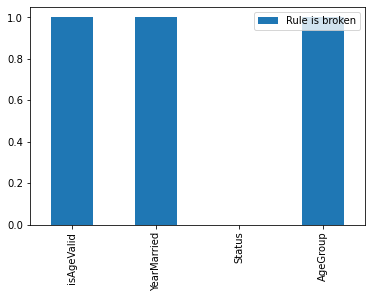

In [17]:
df1.plot.bar()